In [60]:
import sklearn.datasets as sk
import sklearn.model_selection as skm
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from skimage import data, io, filters
import pandas as pd
import tensorflow as tf
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
cd ../Downloads

/home/zaioox/Downloads


In [3]:
digits = sk.load_digits(n_class=10, return_X_y=False)

In [4]:
x_train, x_test, y_train, y_test = skm.train_test_split(digits['data'],digits['target'],test_size=0.2205)

In [5]:
decision_tree=DecisionTreeClassifier(max_depth=13,min_samples_leaf=1,min_samples_split=3)

In [6]:
decision_tree.fit(x_train,y_train)
a1=decision_tree.predict(x_test)
b1=decision_tree.predict(x_train)
test1=f1_score(y_test,a1,average='micro')
train1=f1_score(y_train,b1,average='micro')
print(test1,train1)

0.8060453400503778 0.9871428571428571


In [7]:
rnd_clf=RandomForestClassifier(n_estimators=100,max_depth=14,n_jobs=-1)
rnd_clf.fit(x_train,y_train)
a=rnd_clf.predict(x_test)
b=rnd_clf.predict(x_train)
test=f1_score(y_test,a,average='micro')
train=f1_score(y_train,b,average='micro')
print(test,train)

0.9722921914357683 1.0


In [8]:
x_train1=x_train.reshape(5,280,64)
y_train1=y_train.reshape(5,280)

In [9]:
decisionbagging=[]
decisionbaggingPredictions=[0,1,2,3,4]
for i in range(5):
    decisionbagging.append(DecisionTreeClassifier(max_depth=13,min_samples_leaf=1,min_samples_split=3))
    decisionbagging[i].fit(x_train1[i],y_train1[i])
    decisionbaggingPredictions[i]=decisionbagging[i].predict(x_test)
decisionbaggingPredictions=np.array(decisionbaggingPredictions)
y_predicted=np.zeros(decisionbaggingPredictions.shape[1])

for i in range(decisionbaggingPredictions.shape[1]):
    y_predicted_helper=np.zeros(10)
    for j in range(decisionbaggingPredictions.shape[0]):
        y_predicted_helper[decisionbaggingPredictions[j][i]]+=1
    max=0
    index=0
    for j in range(10):
        if(y_predicted_helper[j]>max):
            max=y_predicted_helper[j]
            index=j
    y_predicted[i]=index

In [10]:
print("With 5 trees the accuracy is: ",f1_score(y_test,y_predicted,average='micro')," with 1 tree the accuracy is ", test1)

With 5 trees the accuracy is:  0.8161209068010076  with 1 tree the accuracy is  0.8060453400503778


In [11]:
pictureX=[]
trueVals=[]
for i in range(len(y_test)):
    if(a[i]!=y_test[i]):
        pictureX.append(x_test[i].reshape(8,8))
        trueVals.append(y_test[i])


This image is a : 9


/home/zaioox/.conda/envs/ML/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


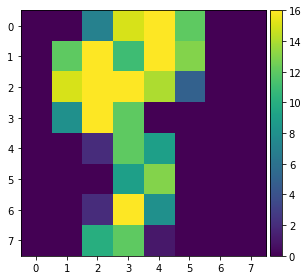

In [12]:
print("This image is a :",trueVals[0])
io.imshow(pictureX[0])

This image is a : 3


/home/zaioox/.conda/envs/ML/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


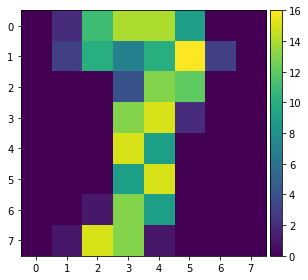

In [13]:
print("This image is a :",trueVals[1])
io.imshow(pictureX[1])

This image is a : 5


/home/zaioox/.conda/envs/ML/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


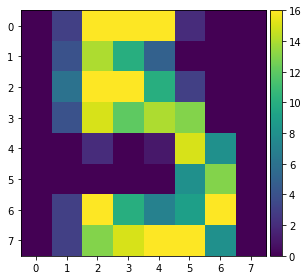

In [14]:
print("This image is a :",trueVals[2])
io.imshow(pictureX[2])

This image is a : 8


/home/zaioox/.conda/envs/ML/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


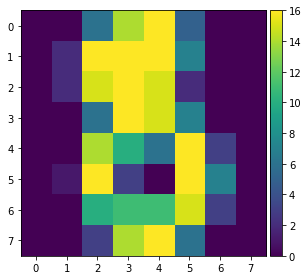

In [15]:
print("This image is a :",trueVals[3])
io.imshow(pictureX[3])

In [16]:
file='internet-traffic-data-in-bits-fr.xlsx'

In [17]:
x1=pd.ExcelFile(file)

In [18]:
df1=x1.parse('internet-traffic-data-in-bits-f')
df1.shape
df1.head()

,Time,"Internet traffic data (in bits) from an ISP. Aggregated traffic in the United Kingdom academic network backbone. It was collected between 19 November 2004, at 09:30 hours and 27 January 2005, at 11:11 hours. Data collected at five minute intervals.",Unnamed: 2
0,2004-11-19 09:30:00,4838.66,NaN
1,2004-11-19 09:35:00,4845.18,NaN
2,2004-11-19 09:40:00,5158,NaN
3,2004-11-19 09:45:00,5637.88,NaN
4,2004-11-19 09:50:00,5520.69,NaN


In [19]:
steps = df1.loc[:,'Internet traffic data (in bits) from an ISP. Aggregated traffic in the United Kingdom academic network backbone. It was collected between 19 November 2004, at 09:30 hours and 27 January 2005, at 11:11 hours. Data collected at five minute intervals.'].tolist()

In [20]:
steps=steps[:19875]
number_steps=12

In [21]:
trainX =np.array([steps[i:i+number_steps] for i in range(len(steps)-number_steps-1)])
trainY=np.array([steps[i+1:i+number_steps+1] for i in range(len(steps)-number_steps-1)])
testX=trainX[0:4000]
trainX=trainX[4000:]
testY=trainY[0:4000]
trainY=trainY[4000:]

In [22]:
trainX=trainX.reshape(-1,number_steps,1)
testX=testX.reshape(-1,number_steps,1)
trainY=trainY.reshape(-1,number_steps,1)
testY=testY.reshape(-1,number_steps,1)
trainX.shape


(15862, 12, 1)

In [23]:
n_steps=number_steps
n_inputs=1
n_neurons=200
n_outputs=1
x=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
cell = tf.contrib.rnn.OutputProjectionWrapper(tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),output_size=1)
outputs, states = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [214]:
learning_rate=0.01
batch_size=1000
loss = tf.reduce_mean(tf.square(outputs-y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)
n_iterations=100
mse=[]
mset=[]
init = tf.global_variables_initializer()

In [215]:
with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        indexes=np.random.choice(list(range(len(trainX))),batch_size)
        sess.run(training_op, feed_dict={x: trainX[indexes], y: trainY[indexes]})
        print([sqrt(loss.eval(feed_dict={x: testX, y: testY}))])
        if iteration %1 == 0:
            mset.append([sqrt(loss.eval(feed_dict={x: testX, y: testY}))])
            mse.append(sqrt(loss.eval(feed_dict={x:trainX,y:trainY})))
            print(len(mse))


[2300.906995078245]
1
[2772.1340155194516]
2
[2567.3758003066087]
3
[1558.518366911343]
4
[2570.5737686360994]
5
[1028.9427219238203]
6
[1600.1791305975717]
7
[1777.1135304194834]
8
[1675.2863188123993]
9
[1365.1950410106242]
10
[909.6585554481418]
11
[718.2106889694695]
12
[1133.7609977415875]
13
[1135.0220262179937]
14
[763.3585740004497]
15
[532.7053301310209]
16
[619.6025439747646]
17
[741.492708999893]
18
[781.2854391962005]
19
[719.5991722827368]
20
[580.702510972701]
21
[410.0156247022789]
22
[317.61279984440176]
23
[400.48468681711165]
24
[504.6295516267354]
25
[506.0544220980585]
26
[382.89495540552633]
27
[220.44766243940987]
28
[263.8089241051182]
29
[343.15374424228565]
30
[325.1009458614355]
31
[253.87329209174408]
32
[179.03170546721606]
33
[191.0173625943464]
34
[182.26337399488685]
35
[171.56910278733173]
36
[171.89537947360597]
37
[168.8955506555753]
38
[164.6624032110852]
39
[163.6852269315255]
40
[165.9509351905707]
41
[168.06366794871224]
42
[168.86750538513914]
43


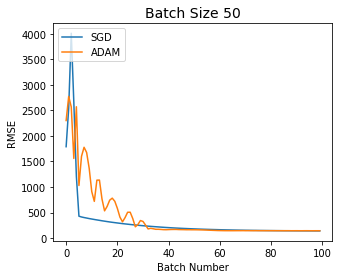

In [216]:

iterations=np.arange(len(mse))

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Batch Size 50", fontsize=14)
plt.xlabel("Batch Number")
plt.ylabel("RMSE")
plt.plot(mset1 ,label="SGD")
plt.plot(mset ,label="ADAM")
plt.legend(loc="upper left")
plt.show()